In [1]:
import numpy as np
import pandas as pd

# importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebook
%matplotlib inline

In [2]:
DATA = 'informer_5G_ftM_sl96_ll48_pl3_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1'

In [3]:
metrics = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/metrics.npy')
metrics

array([2.0698674e+03, 1.3664946e+08, 1.1689716e+04,           inf,
                 inf], dtype=float32)

In [4]:
real_prediction = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/real_prediction.npy')
real_prediction

array([[[-4.1223396e+01, -1.3685507e+01, -2.1880536e+00,  1.3444836e+01,
         -1.3529108e+02,  3.9908447e+00, -1.0485617e+04],
        [-4.2012501e+01, -1.4094500e+01, -2.6693845e+00,  1.3046551e+01,
         -1.4171776e+02,  1.0989258e+01, -5.1909922e+03],
        [-4.9825024e+01, -1.3569615e+01, -2.6918650e-01,  1.2540421e+01,
         -1.2751724e+02,  4.0197456e+01,  5.5691836e+03]]], dtype=float32)

In [5]:
true = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/true.npy')
pred = np.load(f'/home/bde/Git/Informer2020/results/{DATA}/pred.npy')

print(true.shape)
print(pred.shape)

(4864, 3, 7)
(4864, 3, 7)


In [6]:
df_true = pd.DataFrame.from_records(true)
df_true.head()

,0,1,2
0,"[-81.0, -9.0, 3.0, 15.0, -81.0, 182.0, 21206.0]","[-81.0, -8.0, 14.0, 15.0, -81.0, 59.0, 24186.0]","[-81.0, -8.0, 14.0, 15.0, -87.0, 72.0, 25038.0]"
1,"[-81.0, -8.0, 14.0, 15.0, -81.0, 59.0, 24186.0]","[-81.0, -8.0, 14.0, 15.0, -87.0, 72.0, 25038.0]","[-79.0, -8.0, 18.0, 15.0, -85.0, 70.0, 25725.0]"
2,"[-81.0, -8.0, 14.0, 15.0, -87.0, 72.0, 25038.0]","[-79.0, -8.0, 18.0, 15.0, -85.0, 70.0, 25725.0]","[-79.0, -8.0, 18.0, 15.0, -77.0, 208.0, 102522.0]"
3,"[-79.0, -8.0, 18.0, 15.0, -85.0, 70.0, 25725.0]","[-79.0, -8.0, 18.0, 15.0, -77.0, 208.0, 102522.0]","[-71.0, -8.0, 30.0, 15.0, -81.0, 212.0, 159952.0]"
4,"[-79.0, -8.0, 18.0, 15.0, -77.0, 208.0, 102522.0]","[-71.0, -8.0, 30.0, 15.0, -81.0, 212.0, 159952.0]","[-71.0, -8.0, 30.0, 15.0, -81.0, 245.0, 178075.0]"


In [7]:
df_pred = pd.DataFrame.from_records(pred)
df_pred.head()

,0,1,2
0,"[-85.44421, -9.830693, 5.22039, 9.712083, -82....","[-84.26594, -10.458422, 4.5240355, 10.112888, ...","[-84.90302, -9.680153, 6.409686, 10.335095, -8..."
1,"[-83.61639, -9.227751, 7.3800554, 11.074797, -...","[-85.37853, -10.093615, 5.4892645, 10.129019, ...","[-85.511086, -9.196117, 7.021331, 10.458785, -..."
2,"[-82.5547, -8.993186, 6.965383, 10.535301, -79...","[-83.822685, -10.014213, 4.9740767, 9.620333, ...","[-85.85288, -9.325266, 7.0055046, 10.630972, -..."
3,"[-85.400894, -10.071102, 5.7329235, 9.988113, ...","[-85.59029, -9.912258, 5.846255, 10.370002, -8...","[-84.80927, -9.430355, 7.004138, 10.627078, -8..."
4,"[-84.674194, -9.547897, 6.8971415, 10.683855, ...","[-86.0029, -9.570097, 6.0788136, 9.82166, -82....","[-85.14152, -9.01217, 7.5697975, 10.7198105, -..."


In [8]:
df_true.iloc[0]

0    [-81.0, -9.0, 3.0, 15.0, -81.0, 182.0, 21206.0]
1    [-81.0, -8.0, 14.0, 15.0, -81.0, 59.0, 24186.0]
2    [-81.0, -8.0, 14.0, 15.0, -87.0, 72.0, 25038.0]
Name: 0, dtype: object

In [9]:
df_pred.iloc[0]

0    [-85.44421, -9.830693, 5.22039, 9.712083, -82....
1    [-84.26594, -10.458422, 4.5240355, 10.112888, ...
2    [-84.90302, -9.680153, 6.409686, 10.335095, -8...
Name: 0, dtype: object

In [10]:
df_true_0 = pd.DataFrame.from_records(df_true.iloc[0])
df_pred_0 = pd.DataFrame.from_records(df_pred.iloc[0])

<Figure size 2400x1200 with 0 Axes>

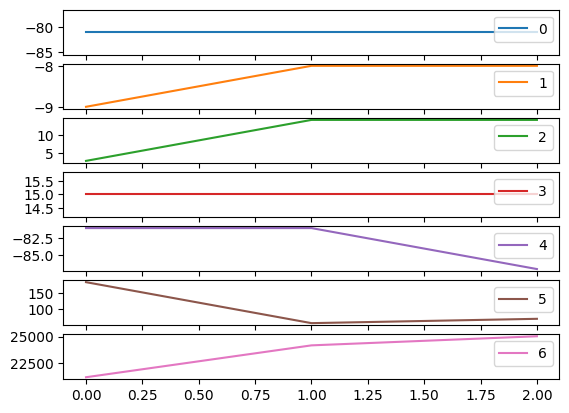

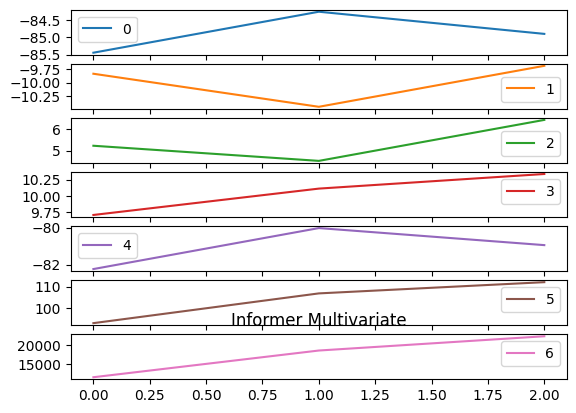

In [13]:
plt.figure(figsize=(16, 8), dpi=150)

df_true_0.plot(subplots=True, label='true')
df_pred_0.plot(subplots=True, label='pred')

plt.title('Informer Multivariate')
# adding Label to the x-axis
#plt.xlabel('Years')
# adding legend to the curve
plt.legend()

In [ ]:

ax = df_true_0.plot(figsize=(30,15), subplots=True, )
df_pred_0.plot(ax=ax)
#df.plot(layout=(1,2))

In [ ]:
#df.plot(figsize=(30,15))